In [ ]:
import pandas as pd
import os
import math
import collections
from sklearn import metrics
import re
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sql_keywords = re.compile("(?P<UNION>UNION\s+(ALL\s+)?SELECT)|(?P<PREFIX>([\'\"\)]|((\'|\"|\)|\d+|\w+)\s))(\|\|\&\&|and|or|as|where|IN\sBOOLEAN\sMODE)(\s|\()(\(?\'?-?\d+\'?(=|LIKE|<|>|<=|>=)\'?-?\d+|\(?[\'\"\\\"]\S+[\'\"\\\"](\s+)?(=|LIKE|<|>|<=|>=)(\s+)?[\'\"\\\"]))|(?P<USUAL>([\'\"]\s*)(\|\||\&\&|and|or)(\s*[\'\"])(\s*[\'\"])=)|(?P<DROP>;\s*DROP\s+(TABLE|DATABASE)\s(IF\s+EXISTS\s)?\S+)|(?P<NOTIN>\snot\sin\s?\((\d+|(\'|\")\w+(\'|\"))\))|(?P<LIMIT>LIMIT\s+\d+(\s+)?,(\s+)?\d+)|GROUP_CONCAT\((?P<GRPCONCAT>.*?)\)|(?P<ORDERBY>ORDER\s+BY\s+\d+)|CONCAT\((?P<CONCAT>.*?)\)|(?P<CASEWHEN>\(CASE\s(\d+\s|\(\d+=\d+\)\s|NULL\s)?WHEN\s(\d+|\(?\d+=\d+\)?|NULL)\sTHEN\s(\d+|\(\d+=\d+\)|NULL)\sELSE)|(?P<DBNAME>(?:(?:m(?:s(?:ysaccessobjects|ysaces|ysobjects|ysqueries|ysrelationships|ysaccessstorage|ysaccessxml|ysmodules|ysmodules2|db)|aster\.\.sysdatabases|ysql\.db)|s(?:ys(?:\.database_name|aux)|chema(?:\W*\(|_name)|qlite(_temp)?_master)|d(?:atabas|b_nam)e\W*\(|information_schema|pg_(catalog|toast)|northwind|tempdb)))|(?P<DATABASE>DATABASE\(\))|(?P<DTCNAME>table_name|column_name|table_schema|schema_name)|(?P<CAST>CAST\(.*AS\s+\w+\))|(?P<INQUERY>\(SELECT[^a-z_0-9])|(?P<CHRBYPASS>((CHA?R\(\d+\)(,|\|\||\+)\s?)+)|CHA?R\((\d+,\s?)+\))|(?P<FROMDB>\sfrom\s(dual|sysmaster|sysibm)[\s.:])|(?P<MYSQLFUNC>[^.](ABS|ACOS|ADDDATE|ADDTIME|AES_DECRYPT|AES_ENCRYPT|ANY_VALUE|ASCII|ASIN|ASYMMETRIC_DECRYPT|ASYMMETRIC_DERIVE|ASYMMETRIC_ENCRYPT|ASYMMETRIC_SIGN|ASYMMETRIC_VERIFY|ATAN|ATAN2|AVG|BENCHMARK|BIN|BIT_AND|BIT_COUNT|BIT_LENGTH|BIT_OR|BIT_XOR|CAST|CEIL|CEILING|CHAR|CHAR_LENGTH|CHARACTER_LENGTH|CHARSET|COALESCE|COERCIBILITY|COLLATION|COMPRESS|CONCAT|CONCAT_WS|CONNECTION_ID|CONV|CONVERT|CONVERT_TZ|COS|COT|COUNT|COUNT|CRC32|CREATE_ASYMMETRIC_PRIV_KEY|CREATE_ASYMMETRIC_PUB_KEY|CREATE_DH_PARAMETERS|CREATE_DIGEST|CURDATE|CURRENT_DATE|CURRENT_TIME|CURRENT_TIMESTAMP|CURRENT_USER|CURTIME|DATABASE|DATE|DATE_ADD|DATE_FORMAT|DATE_SUB|DATEDIFF|DAY|DAYNAME|DAYOFMONTH|DAYOFWEEK|DAYOFYEAR|DECODE|DEFAULT|DEGREES|ELT|ENCODE|EXP|EXPORT_SET|EXTRACT|EXTRACTVALUE|FIELD|FIND_IN_SET|FLOOR|FORMAT|FOUND_ROWS|FROM_BASE64|FROM_DAYS|FROM_UNIXTIME|GeometryCollection|GET_FORMAT|GET_LOCK|GREATEST|GROUP_CONCAT|GTID_SUBSET|GTID_SUBTRACT|HEX|HOUR|IF|IFNULL|IIF|IN|INET_ATON|INET_NTOA|INET6_ATON|INET6_NTOA|INSERT|INSTR|INTERVAL|IS_FREE_LOCK|IS_IPV4|IS_IPV4_COMPAT|IS_IPV4_MAPPED|IS_IPV6|IS_USED_LOCK|ISNULL|JSON_APPEND|JSON_ARRAY|JSON_ARRAY_APPEND|JSON_ARRAY_INSERT|JSON_CONTAINS|JSON_CONTAINS_PATH|JSON_DEPTH|JSON_EXTRACT|JSON_INSERT|JSON_KEYS|JSON_LENGTH|JSON_MERGE|JSON_OBJECT|JSON_QUOTE|JSON_REMOVE|JSON_REPLACE|JSON_SEARCH|JSON_SET|JSON_TYPE|JSON_UNQUOTE|JSON_VALID|LAST_INSERT_ID|LCASE|LEAST|LEFT|LENGTH|LineString|LN|LOAD_FILE|LOCALTIME|LOCALTIMESTAMP|LOCATE|LOG|LOG10|LOG2|LOWER|LPAD|LTRIM|MAKE_SET|MAKEDATE|MAKETIME|MASTER_POS_WAIT|MAX|MBRContains|MBRCoveredBy|MBRCovers|MBRDisjoint|MBREquals|MBRIntersects|MBROverlaps|MBRTouches|MBRWithin|MICROSECOND|MID|MIN|MINUTE|MOD|MONTH|MONTHNAME|MultiLineString|MultiPoint|MultiPolygon|NAME_CONST|NOT IN|NOW|NULLIF|OCT|OCTET_LENGTH|OLD_PASSWORD|ORD|PERIOD_ADD|PERIOD_DIFF|PI|Point|Polygon|POSITION|POW|POWER|PROCEDURE ANALYSE|QUARTER|QUOTE|RADIANS|RAND|RANDOM_BYTES|RELEASE_ALL_LOCKS|RELEASE_LOCK|REPEAT|REPLACE|REVERSE|RIGHT|ROUND|ROW_COUNT|RPAD|RTRIM|SCHEMA|SEC_TO_TIME|SECOND|SESSION_USER|SHA1|SHA2|SIGN|SIN|SLEEP|SOUNDEX|SPACE|SQRT|ST_Area|ST_AsBinary|ST_AsGeoJSON|ST_AsText|ST_Buffer|ST_Buffer_Strategy|ST_Centroid|ST_Contains|ST_ConvexHull|ST_Crosses|ST_Difference|ST_Dimension|ST_Disjoint|ST_Distance|ST_Distance_Sphere|ST_EndPoint|ST_Envelope|ST_Equals|ST_ExteriorRing|ST_GeoHash|ST_GeomCollFromText|ST_GeomCollFromWKB|ST_GeometryN|ST_GeometryType|ST_GeomFromGeoJSON|ST_GeomFromText|ST_GeomFromWKB|ST_InteriorRingN|ST_Intersection|ST_Intersects|ST_IsClosed|ST_IsEmpty|ST_IsSimple|ST_IsValid|ST_LatFromGeoHash|ST_Length|ST_LineFromText|ST_LineFromWKB|ST_LongFromGeoHash|ST_MakeEnvelope|ST_MLineFromText|ST_MLineFromWKB|ST_MPointFromText|ST_MPointFromWKB|ST_MPolyFromText|ST_MPolyFromWKB|ST_NumGeometries|ST_NumInteriorRing|ST_NumPoints|ST_Overlaps|ST_PointFromGeoHash|ST_PointFromText|ST_PointFromWKB|ST_PointN|ST_PolyFromText|ST_PolyFromWKB|ST_Simplify|ST_SRID|ST_StartPoint|ST_SymDifference|ST_Touches|ST_Union|ST_Validate|ST_Within|ST_X|ST_Y|StartPoint|STD|STDDEV|STDDEV_POP|STDDEV_SAMP|STR_TO_DATE|STRCMP|SUBDATE|SUBSTR|SUBSTRING|SUBSTRING_INDEX|SUBTIME|SUM|SYSDATE|SYSTEM_USER|TAN|TIME|TIME_FORMAT|TIME_TO_SEC|TIMEDIFF|TIMESTAMP|TIMESTAMPADD|TIMESTAMPDIFF|TO_BASE64|TO_DAYS|TO_SECONDS|TRIM|TRUNCATE|UCASE|UNCOMPRESS|UNCOMPRESSED_LENGTH|UNHEX|UNIX_TIMESTAMP|UpdateXML|UPPER|USER|UTC_DATE|UTC_TIME|UTC_TIMESTAMP|UUID|UUID_SHORT|VALIDATE_PASSWORD_STRENGTH|VALUES|VAR_POP|VAR_SAMP|VARIANCE|VERSION|WAIT_FOR_EXECUTED_GTID_SET|WAIT_UNTIL_SQL_THREAD_AFTER_GTIDS|WEEK|WEEKDAY|WEEKOFYEAR|WEIGHT_STRING|YEAR|YEARWEEK)\()|(?P<BOOLEAN>\'?-?\d+\'?(=|LIKE)\'?-?\d+($|\s|\)|,|--|#)|[\'\"\\\"]\S+[\'\"\\\"](\s+)?(=|LIKE)(\s+)?[\'\"\\\"]\S+)|(?P<PLAIN>(@|##|#)[A-Z]\w+|[A-Z]\w*(?=\s*\.)|(?<=\.)[A-Z]\w*|[A-Z]\w*(?=\()|`(``|[^`])*`|´(´´|[^´])*´|[_A-Z][_$#\w]*|[가-힣]+)", re.IGNORECASE)

In [ ]:
from itertools import groupby

def tokenise(rawInput):
    if sql_keywords.search(rawInput):
        return [tok[0] for tok in groupby([match.lastgroup for match in sql_keywords.finditer(rawInput)])]
    else:
        return ['PLAIN']

def generateCombinations(token_list, N):
    tokenCombinations = []
    for n in range(0,N):
        tokenCombinations += zip(*(token_list[i:] for i in range(n+1)))
    return [str(tuple) for tuple in tokenCombinations]

In [ ]:
def G_test_score(count, expected):
        if (count == 0):
            return 0
        else:
            return 2.0 * count * math.log(count/expected)

def G_test(tokens, types):
    tokens_cnt = tokens.value_counts().astype(float)
    types_cnt = types.value_counts().astype(float)
    total_cnt = float(sum(tokens_cnt))

    tokenTable = collections.defaultdict(lambda : collections.Counter())
    for _tokens, _types in zip(tokens.values, types.values):
        tokenTable[_tokens][_types] += 1

    datax = []


    tc_dataframe = pd.DataFrame(list(tokenTable.values()), index=tokenTable.keys())
    tc_dataframe.fillna(0, inplace=True)

    for column in tc_dataframe.columns.tolist():
        tc_dataframe[column+'_exp'] = (tokens_cnt / total_cnt) * types_cnt[column]
        tc_dataframe[column+'_GTest'] = [G_test_score(tkn_count, exp) for tkn_count, exp in zip(tc_dataframe[column], tc_dataframe[column+'_exp'])]

    return tc_dataframe

def Entropy(rawInput):
    p, lns = collections.Counter(str(rawInput)), float(len(str(rawInput)))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

def G_means(tokenCombinations, c_name):
    try:
        scores = [tc_dataframe.loc[token][c_name] for token in tokenCombinations]
    except KeyError:
        return 0
    return sum(scores)/len(scores) if scores else 0 


In [ ]:
basedir = '/content/drive/MyDrive/training_data'
filelist = os.listdir(basedir)
raw_list = []
for file in filelist:
    if file == '.DS_Store':
        continue
    df = pd.read_csv(os.path.join(basedir,file), sep='Aw3s0meSc0t7', names=['rawInput'], header=None, engine='python', encoding='latin1')
    df['type'] = 'plain' if file.split('.')[0] == 'plain' else 'sqli'
    raw_list.append(df)

In [ ]:
df_final = pd.concat(raw_list, ignore_index=True)
df_final.dropna(inplace=True)

df_final['tokens'] = df_final['rawInput'].map(lambda x: tokenise(x))

df_final['tokenCombinations'] = df_final['tokens'].map(lambda x: generateCombinations(x, 3))

In [ ]:
_tokens, _types = zip(*[(token,token_type) for token_list,token_type in zip(df_final['tokenCombinations'], df_final['type']) for token in token_list])
tc_dataframe = G_test(pd.Series(_tokens), pd.Series(_types))

In [ ]:
df_final['tokenCount'] = df_final['tokens'].map(lambda x: len(x))
df_final['entropy'] = df_final['rawInput'].map(lambda x: Entropy(x))
df_final['sqliScore'] = df_final['tokenCombinations'].map(lambda x: G_means(x, 'sqli_GTest'))
df_final['plainScore'] = df_final['tokenCombinations'].map(lambda x: G_means(x, 'plain_GTest'))


In [ ]:
df_final

,rawInput,type,tokens,tokenCombinations,tokenCount,entropy,sqliScore,plainScore
0,Add plain text here,plain,[PLAIN],"[('PLAIN',)]",1,3.536887,-5382.305485,9805.126468
1,âNe te quaesiveris extra.â,plain,[PLAIN],"[('PLAIN',)]",1,3.894740,-5382.305485,9805.126468
2,âMan is his own star; and the soul that can,plain,[PLAIN],"[('PLAIN',)]",1,3.871990,-5382.305485,9805.126468
3,"Render an honest and a perfect man,",plain,[PLAIN],"[('PLAIN',)]",1,3.622739,-5382.305485,9805.126468
4,"Commands all light, all influence, all fate;",plain,[PLAIN],"[('PLAIN',)]",1,3.854223,-5382.305485,9805.126468
...,...,...,...,...,...,...,...,...
89953,  j,sqli,[PLAIN],"[('PLAIN',)]",1,1.500000,-5382.305485,9805.126468
89954,  j,sqli,[PLAIN],"[('PLAIN',)]",1,1.500000,-5382.305485,9805.126468
89955,  j,sqli,[PLAIN],"[('PLAIN',)]",1,1.500000,-5382.305485,9805.126468
89956,  j,sqli,[PLAIN],"[('PLAIN',)]",1,1.500000,-5382.305485,9805.126468


In [ ]:
import sklearn
# %!sklearn --v

In [ ]:
df_final.to_csv('/content/drive/MyDrive/training_data/dataset.csv')

In [ ]:
X = df_final[['tokenCount', 'entropy','sqliScore','plainScore']].to_numpy();

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(df_final['type'].tolist())

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

Preprocessing Starts here.



































In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1)
print("Train Shape :  {}" . format(X_train.shape))
print("Test Shape : {}" . format(X_test.shape))

Train Shape :  (67468, 4)
Test Shape : (22490, 4)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [ ]:
print ("Random Forest Clasifier Accuracy: %f" % clf.score(X_test, y_test))

Random Forest Clasifier Accuracy: 0.959715


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=7, random_state=0).fit(X_train, y_train)
print ("Gradient Boosting Tree Acurracy: %f" % clf.score(X_test, y_test))

Gradient Boosting Tree Acurracy: 0.926323


In [ ]:
from joblib import dump
dump(clf, './randomForestModel.joblib')

['./randomForestModel.joblib']

In [ ]:
import joblib


In [ ]:
loaded_model = joblib.load('/content/randomForestModel.joblib')
result = loaded_model.score(X_test, y_test)
print(result)

0.926322810137839


In [ ]:
from joblib import *

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.predict([[0, 0, 0, 0]]))

[1]


In [ ]:
print ("Gaussian Naive Bayes: %f" % gnb.score(X_test, y_test))

Gaussian Naive Bayes: 0.434815


In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/training_data/logistic_Regression.joblib')
result = loaded_model.score(X_test, y_test)
print(result)

0.4341929746554024


In [ ]:
def detectSQLI(sql):
    _tmp = re.sub(r'(/\*[\w\d(\`|\~|\!|\@|\#|\$|\%|\^|\&|\*|\(|\)|\-|\_|\=|\+|\[|\{|\]|\}|\\|\:|\;|\'|\"|\<|\>|\,|\.|\?)\s\r\n\v\f]*\*/)', ' ', sql)
    _tmp = re.sub(r'(/\*!\d+|\*/)', ' ', _tmp)
    tokens = tokenise(_tmp.strip())
    tokenCombinations = generateCombinations(tokens, 3)
    sqliScore = G_means(tokenCombinations, 'sqli_GTest')
    plainScore = G_means(tokenCombinations, 'plain_GTest')
    _X = [[len(tokens), Entropy(sql), sqliScore, plainScore]]
    return dtc.predict(_X)



Decision Tree Acurracy: 0.940285
f1 Score 0.968872
Accuracy: 0.940285
Precision: 0.969389
Recall: 0.968356


Text(0.5, 1.0, 'Accuracy Score: 0.940')

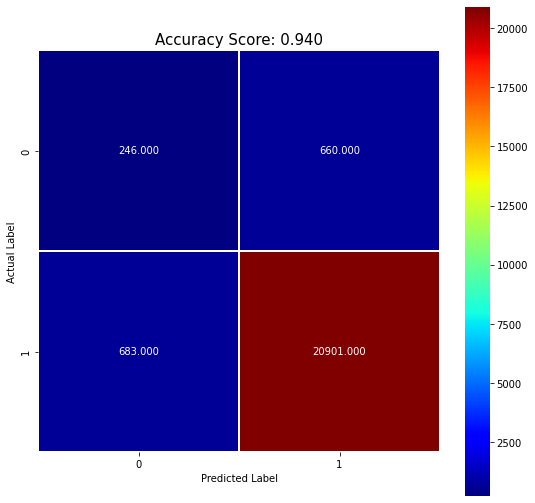

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
print ("Decision Tree Acurracy: %f" % dtc.score(X_test, y_test))
y_pred_dtc=dtc.predict(X_test)
dtc_accuracy_metric=metrics.accuracy_score(y_test,y_pred_dtc)
dtc_precision_metric=metrics.precision_score(y_test,y_pred_dtc)
dtc_recall_metric=metrics.recall_score(y_test,y_pred_dtc)
dtc_f1=2 * (dtc_precision_metric * dtc_recall_metric) / (dtc_precision_metric + dtc_recall_metric)
print("f1 Score %f" % dtc_f1)
print("Accuracy: %f" % dtc_accuracy_metric)
print("Precision: %f" % dtc_precision_metric)
print("Recall: %f" % dtc_recall_metric)
cm6=metrics.confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(9,9))
sns.heatmap(cm6,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='jet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title='Accuracy Score: {:.3f}'.format(dtc_accuracy_metric)
plt.title(title,size=15)

In [ ]:
query = "vanshit kandoi 1=1"
res = detectSQLI(query)
print ("Raw Input: %s" % query)
print ("Result: ")
if res == 1:
    print ("SQLI")
else:
    print ("NORMAL")


Raw Input: abhishek padhy 1=1
Result: 
SQLI


Classifiers

In [ ]:
from sklearn import  metrics
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

Gaussian Naive Bayes Accuracy: 0.434815
f1 Score 0.582658
Accuracy: 0.434815
Precision: 1.000000
Recall: 0.411092


Text(0.5, 1.0, 'Accuracy Score: 0.435')

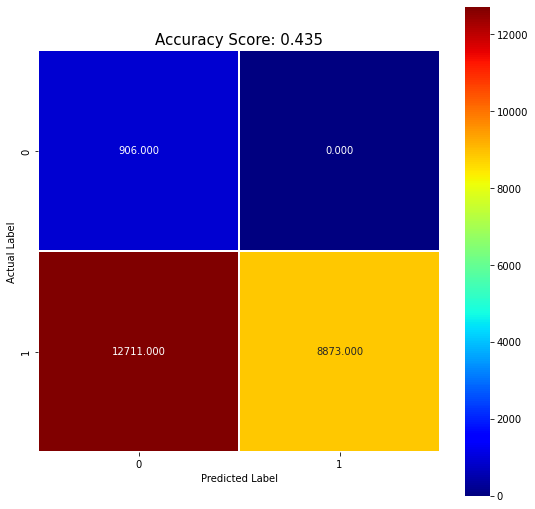

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print ("Gaussian Naive Bayes Accuracy: %f" % gnb.score(X_test, y_test))
y_pred_gnb=gnb.predict(X_test)
gnb_accuracy_metric=metrics.accuracy_score(y_test,y_pred_gnb)
gnb_precision_metric=metrics.precision_score(y_test,y_pred_gnb)
gnb_recall_metric=metrics.recall_score(y_test,y_pred_gnb)
gnb_f1=2 * (gnb_precision_metric * gnb_recall_metric) / (gnb_precision_metric + gnb_recall_metric)
print("f1 Score %f" % gnb_f1)
print("Accuracy: %f" % gnb_accuracy_metric)
print("Precision: %f" % gnb_precision_metric)
print("Recall: %f" % gnb_recall_metric)
cm6=metrics.confusion_matrix(y_test,y_pred_gnb)
plt.figure(figsize=(9,9))
sns.heatmap(cm6,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='jet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title='Accuracy Score: {:.3f}'.format(gnb_accuracy_metric)
plt.title(title,size=15)

Logistic Regression Classifier Accuracy: 0.959715
f1 Score 0.979444
Accuracy: 0.959715
Precision: 0.959715
Recall: 1.000000


Text(0.5, 1.0, 'Accuracy Score: 0.960')

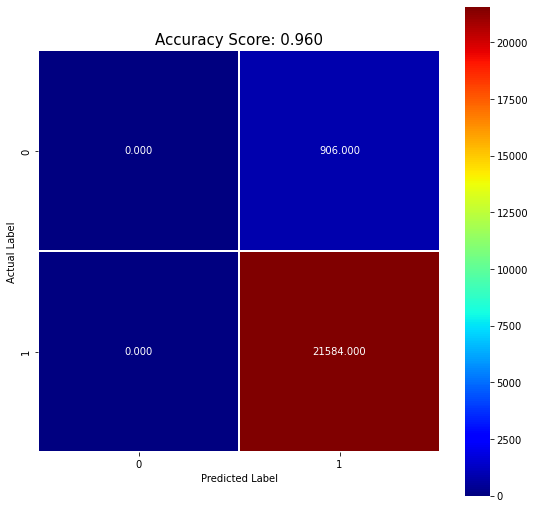

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(X_train, y_train)
print ("Logistic Regression Classifier Accuracy: %f" % logistic_model.score(X_test, y_test))
y_pred_logistic_model=logistic_model.predict(X_test)
logistic_model_accuracy_metric=metrics.accuracy_score(y_test,y_pred_logistic_model)
logistic_model_precision_metric=metrics.precision_score(y_test,y_pred_logistic_model)
logistic_model_recall_metric=metrics.recall_score(y_test,y_pred_logistic_model)
logistic_model_f1=2 * (logistic_model_precision_metric * logistic_model_recall_metric) / (logistic_model_precision_metric + logistic_model_recall_metric)
print("f1 Score %f" % logistic_model_f1)
print("Accuracy: %f" % logistic_model_accuracy_metric)
print("Precision: %f" % logistic_model_precision_metric)
print("Recall: %f" % logistic_model_recall_metric)
cm6=metrics.confusion_matrix(y_test,y_pred_logistic_model)
plt.figure(figsize=(9,9))
sns.heatmap(cm6,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='jet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title='Accuracy Score: {:.3f}'.format(logistic_model_accuracy_metric)
plt.title(title,size=15)

Random Forest Classifier Accuracy: 0.959715
f1 Score 0.979444
Accuracy: 0.959715
Precision: 0.959715
Recall: 1.000000


Text(0.5, 1.0, 'Accuracy Score: 0.960')

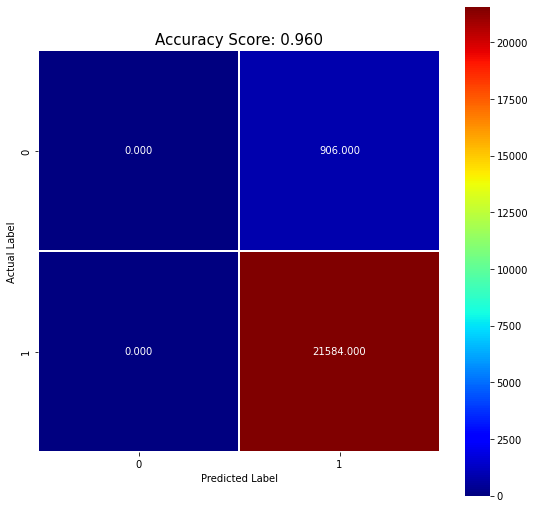

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print ("Random Forest Classifier Accuracy: %f" % clf.score(X_test, y_test))
y_pred_clf=clf.predict(X_test)
clf_accuracy_metric=metrics.accuracy_score(y_test,y_pred_clf)
clf_precision_metric=metrics.precision_score(y_test,y_pred_clf)
clf_recall_metric=metrics.recall_score(y_test,y_pred_clf)
clf_f1=2 * (clf_precision_metric * clf_recall_metric) / (clf_precision_metric + clf_recall_metric)
print("f1 Score %f" % clf_f1)
print("Accuracy: %f" % clf_accuracy_metric)
print("Precision: %f" % clf_precision_metric)
print("Recall: %f" % clf_recall_metric)
cm6=metrics.confusion_matrix(y_test,y_pred_clf)
plt.figure(figsize=(9,9))
sns.heatmap(cm6,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='jet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title='Accuracy Score: {:.3f}'.format(clf_accuracy_metric)
plt.title(title,size=15)

Adaptive Boosting Classifier Accuracy: 0.959715
Accuracy: 0.959715
Precision: 0.959715
Recall: 1.000000
f1 Score 0.979444


Text(0.5, 1.0, 'Accuracy Score: 0.960')

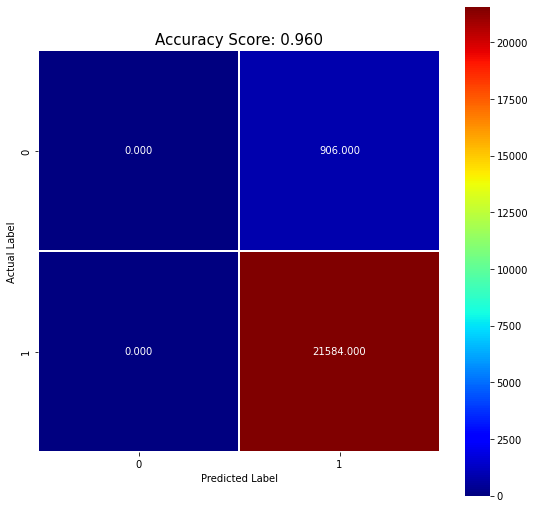

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
ada_boost= AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada_boost.fit(X_train,y_train)
print ("Adaptive Boosting Classifier Accuracy: %f" % ada_boost.score(X_test, y_test))
y_pred_ada_boost=ada_boost.predict(X_test)
ada_boost_accuracy_metric=metrics.accuracy_score(y_test,y_pred_ada_boost)
ada_boost_precision_metric=metrics.precision_score(y_test,y_pred_ada_boost)
ada_boost_recall_metric=metrics.recall_score(y_test,y_pred_ada_boost)
ada_boost_f1=2 * (ada_boost_precision_metric * ada_boost_recall_metric) / (ada_boost_precision_metric + ada_boost_recall_metric)
print("Accuracy: %f" % ada_boost_accuracy_metric)
print("Precision: %f" % ada_boost_precision_metric)
print("Recall: %f" % ada_boost_recall_metric)
print("f1 Score %f" % ada_boost_f1)
cm6=metrics.confusion_matrix(y_test,y_pred_ada_boost)
plt.figure(figsize=(9,9))
sns.heatmap(cm6,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='jet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title='Accuracy Score: {:.3f}'.format(ada_boost_accuracy_metric)
plt.title(title,size=15)


Gradient Boosting Classifier Accuracy: 0.926323
Accuracy: 0.926323
Precision: 0.979037
Recall: 0.943430
f1 Score: 0.960904


Text(0.5, 1.0, 'Accuracy Score: 0.926')

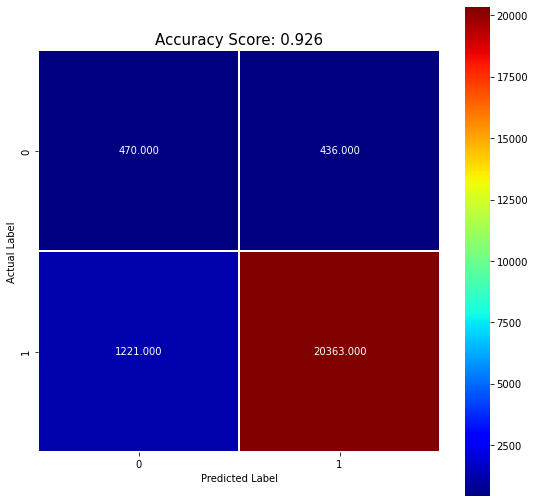

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=7, random_state=0).fit(X_train, y_train)
print ("Gradient Boosting Classifier Accuracy: %f" % gbc.score(X_test, y_test))
y_pred_gbc=gbc.predict(X_test)
gbc_accuracy_metric=metrics.accuracy_score(y_test,y_pred_gbc)
gbc_precision_metric=metrics.precision_score(y_test,y_pred_gbc)
gbc_recall_metric=metrics.recall_score(y_test,y_pred_gbc)
gbc_f1=2 * (gbc_precision_metric * gbc_recall_metric) / (gbc_precision_metric + gbc_recall_metric)
print("Accuracy: %f" % gbc_accuracy_metric)
print("Precision: %f" % gbc_precision_metric)
print("Recall: %f" % gbc_recall_metric)
print("f1 Score: %f" % gbc_f1)
cm6=metrics.confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(9,9))
sns.heatmap(cm6,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='jet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title='Accuracy Score: {:.3f}'.format(gbc_accuracy_metric)
plt.title(title,size=15)

In [ ]:
from joblib import dump
dump(gbc, '/content/drive/MyDrive/training_data/gradientBoosting.joblib')

['/content/drive/MyDrive/training_data/gradientBoosting.joblib']

In [ ]:
from joblib import dump
dump(ada_boost, '/content/drive/MyDrive/training_data/ada_boost.joblib')

['/content/drive/MyDrive/training_data/ada_boost.joblib']

In [ ]:
from joblib import dump
dump(clf, '/content/drive/MyDrive/training_data/randomForest.joblib')

['/content/drive/MyDrive/training_data/randomForest.joblib']

In [ ]:

from joblib import dump
dump(logistic_model, '/content/drive/MyDrive/training_data/logistic_Regression.joblib')

['/content/drive/MyDrive/training_data/logistic_Regression.joblib']

In [ ]:
from joblib import dump
dump(gnb, '/content/drive/MyDrive/training_data/gaussianNaiveBayes.joblib')

['/content/drive/MyDrive/training_data/gaussianNaiveBayes.joblib']

In [ ]:
from joblib import dump
dump(dtc, '/content/drive/MyDrive/training_data/decisionTree.joblib')

['/content/drive/MyDrive/training_data/decisionTree.joblib']

Accuracy: 0.959715
Precision: 0.959715
Recall: 1.000000
f1 Score: 0.979444


Text(0.5, 1.0, 'Accuracy Score: 0.960')

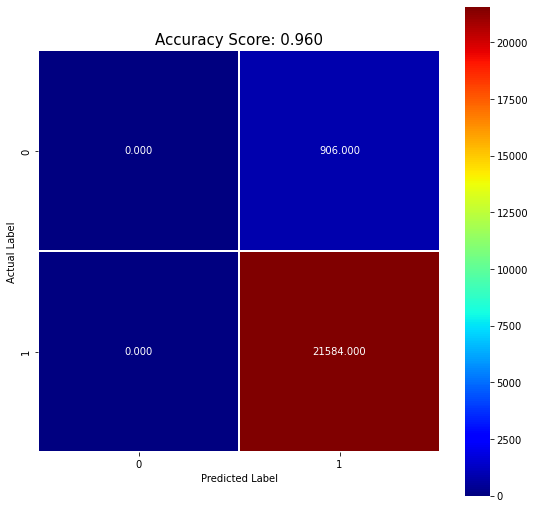

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
estimators=[('rf', RandomForestClassifier(max_depth=2, random_state=0)),
            ('dt',DecisionTreeClassifier(random_state=0)),('gnb',GaussianNB()),
            ('lr', LogisticRegression(random_state = 0)),('ada', AdaBoostClassifier(n_estimators=50,learning_rate=1)),
            ('gb',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=7, random_state=0))]
stc=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stc.fit(X_train, y_train).score(X_test,y_test)
y_pred_stc=stc.predict(X_test)
stc_accuracy_metric=metrics.accuracy_score(y_test,y_pred_stc)
stc_precision_metric=metrics.precision_score(y_test,y_pred_stc)
stc_recall_metric=metrics.recall_score(y_test,y_pred_stc)
stc_f1=2 * (stc_precision_metric * stc_recall_metric) / (stc_precision_metric + stc_recall_metric)
print("Accuracy: %f" % stc_accuracy_metric)
print("Precision: %f" % stc_precision_metric)
print("Recall: %f" % stc_recall_metric)
print("f1 Score: %f" % stc_f1)
cm6=metrics.confusion_matrix(y_test,y_pred_stc)
plt.figure(figsize=(9,9))
sns.heatmap(cm6,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='jet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title='Accuracy Score: {:.3f}'.format(stc_accuracy_metric)
plt.title(title,size=15)

In [ ]:
from joblib import dump
dump(stc, '/content/drive/MyDrive/training_data/stackingClassifier.joblib')

['/content/drive/MyDrive/training_data/stackingClassifier.joblib']

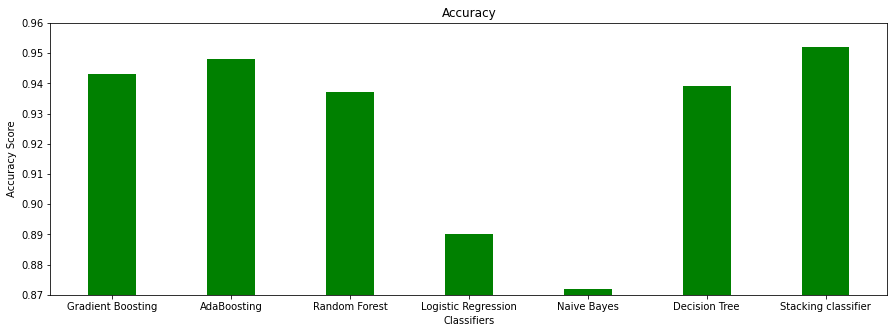

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Gradient Boosting':0.943, 'AdaBoosting':0.948, 'Random Forest':0.937,'Logistic Regression':0.890,'Naive Bayes':0.872,'Decision Tree':0.939,'Stacking classifier':0.952}
classifiers = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(classifiers, values, color ='green',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Score")
plt.title("Accuracy")
plt.ylim([0.87,0.96])
plt.show()


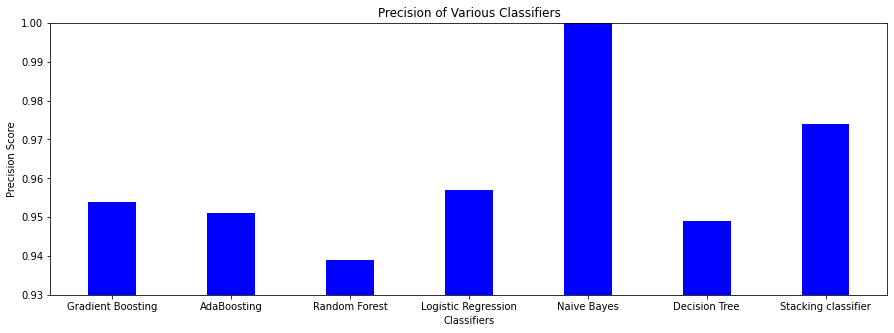

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Gradient Boosting':0.954, 'AdaBoosting':0.951, 'Random Forest':0.939,'Logistic Regression':0.957,'Naive Bayes':1,'Decision Tree':0.949,'Stacking classifier':0.974}
classifiers = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(classifiers, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Precision Score")
plt.title("Precision of Various Classifiers")
plt.ylim([0.93,1])
plt.show()

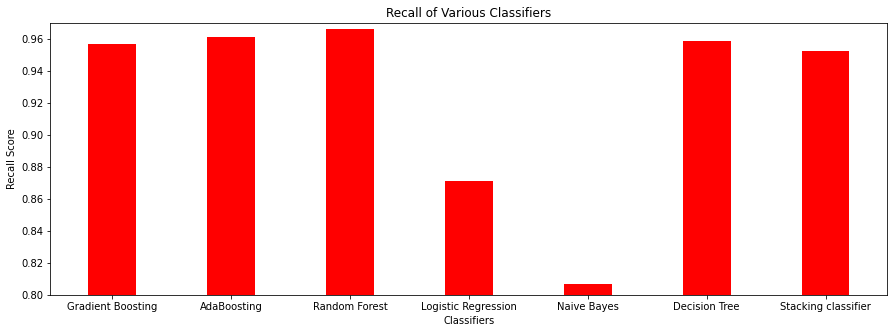

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Gradient Boosting':0.957, 'AdaBoosting':0.961, 'Random Forest':0.966,'Logistic Regression':0.871,'Naive Bayes':0.807,'Decision Tree':0.959,'Stacking classifier':0.9526}
classifiers = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(classifiers, values, color ='red',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Recall Score")
plt.title("Recall of Various Classifiers")
plt.ylim([0.80,0.97])
plt.show()

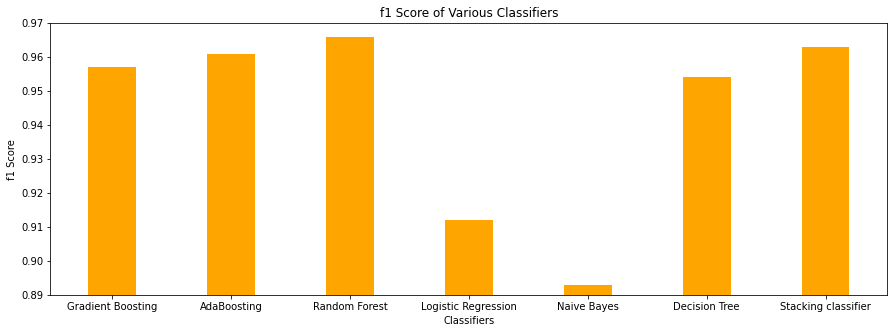

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Gradient Boosting':0.957, 'AdaBoosting':0.961, 'Random Forest':0.966,'Logistic Regression':0.912,'Naive Bayes':0.893,'Decision Tree':0.954,'Stacking classifier':0.963}
classifiers = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(classifiers, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("f1 Score")
plt.title("f1 Score of Various Classifiers")
plt.ylim([0.89,0.97])
plt.show()

STOP HERE__________________